# Random Forest

### Importing Libaries

In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble  import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']= (12,6)
plt.rcParams['figure.dpi']= 1000
sns.set_theme(style="darkgrid",palette="rainbow")
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
%matplotlib inline

### 1. Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_excel("glass.xlsx",sheet_name="glass")
df1 = pd.read_excel("glass.xlsx",sheet_name="Description")

In [3]:
df1  # description of the actual data

Data Description:                                         Unnamed: 1  \
0               RI                                    refractive index   
1                Na   Sodium (unit measurement  weight percent in c...   
2                Mg                                          Magnesium   
3                AI                                           Aluminum   
4                Si                                            Silicon   
5                 K                                          Potassium   
6                Ca                                            Calcium   
7                Ba                                             Barium   
8                Fe                                               Iron   

   Type: Type of glass: (class attribute)  \
0                                     1.0   
1                                     2.0   
2                                     3.0   
3                                     4.0   
4                                     5.0   
5                                     6.0   
6                                     7.0   
7                                     NaN   
8                                     NaN   

                                          Unnamed: 3  
0                   building_windows_float_processed  
1               building_windows_non_float_processed  
2                    vehicle_windows_float_processed  
3  vehicle_windows_non_float_processed (none in t...  
4                                         containers  
5                                          tableware  
6                                          headlamps  
7                                                NaN  
8                                                NaN

In [4]:
df1["Unnamed: 3"].unique()

array([' building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed',
       'vehicle_windows_non_float_processed (none in this database)',
       'containers', 'tableware', 'headlamps', nan], dtype=object)

In [5]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

In [6]:
df['Type'].value_counts()  #imbalance in class 

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [7]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [8]:
df.isnull().sum()  #no null values detected

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
df.drop_duplicates(inplace = True)
df   #one duplicate removed 

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[213 rows x 10 columns]

### 2: Data Visualization

In [10]:
df.hist(bins=15)
plt.tight_layout()
#data is not normally distributed 

In [11]:
df.skew()  

RI      1.648017
Na      0.465699
Mg     -1.146096
Al      0.938402
Si     -0.744646
K       6.545429
Ca      2.050752
Ba      3.406749
Fe      1.747173
Type    1.108861
dtype: float64

In [12]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

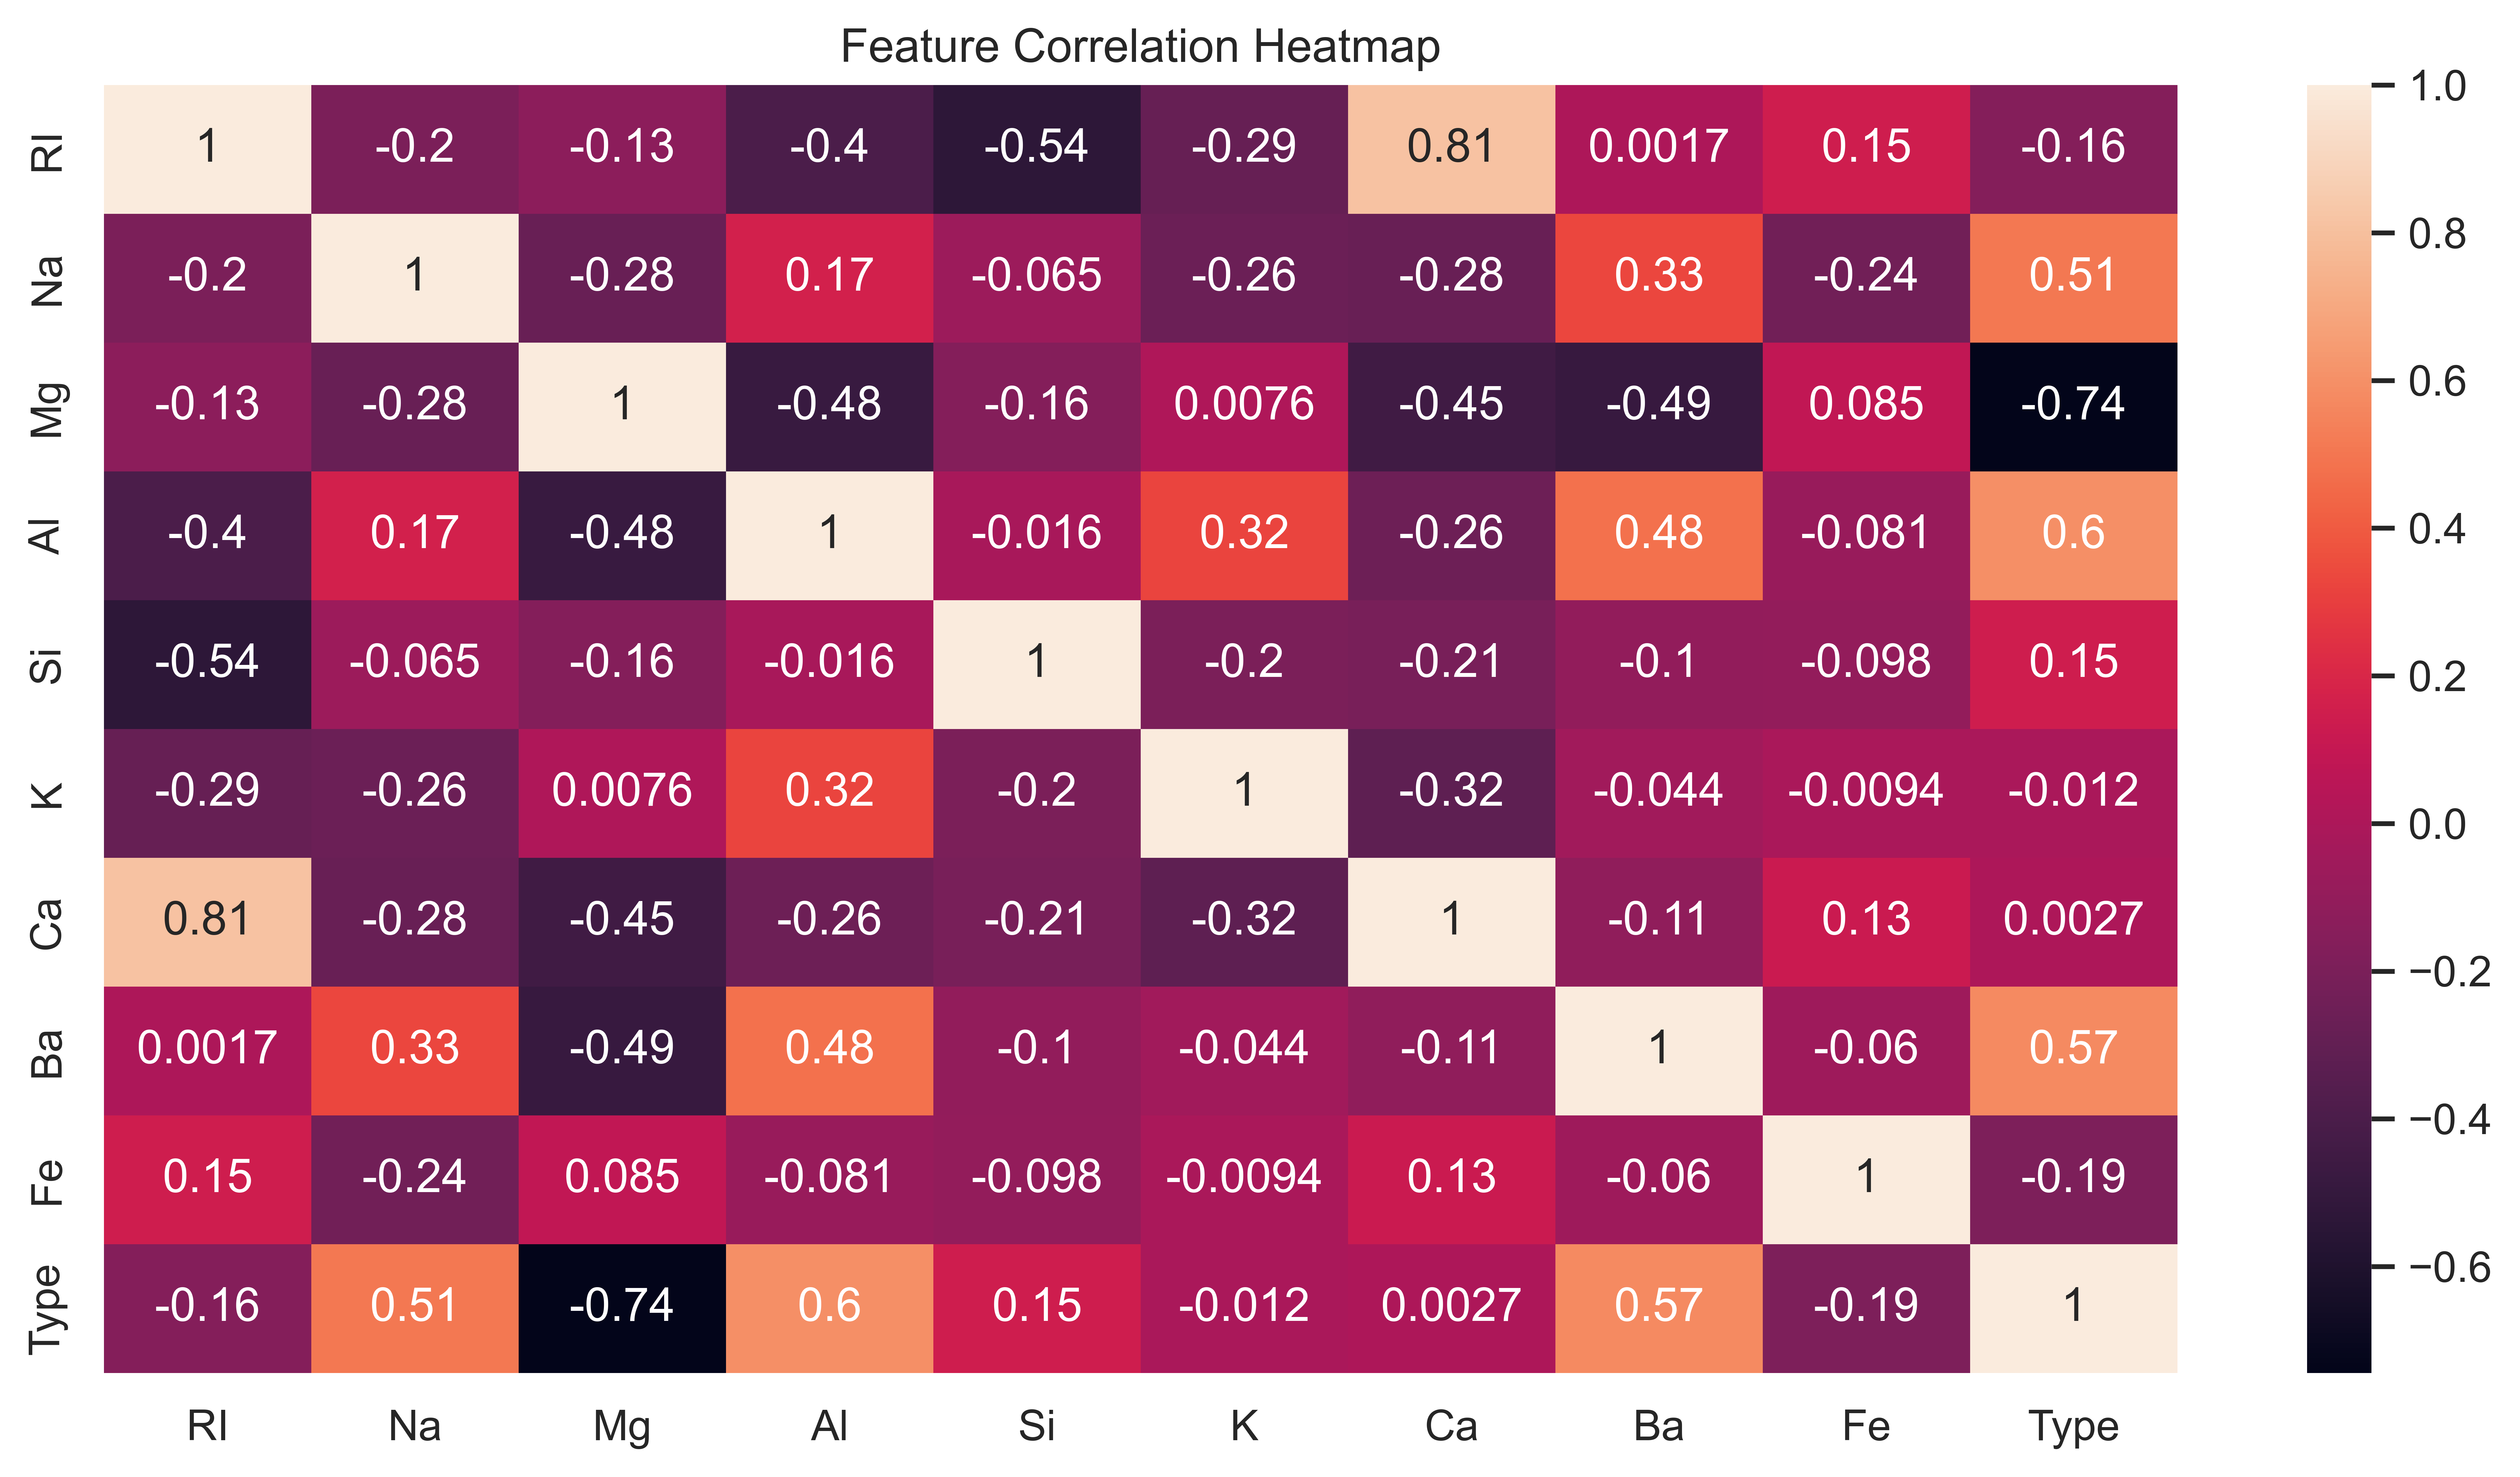

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [14]:
sns.histplot(df['Type'])

<Axes: xlabel='Type', ylabel='Count'>

### 3: Data Preprocessing

In [15]:
#outliers detected in boxplot using capping to handling outliers

In [16]:
def capping(data,columns):
    for col in df.columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lower =q1-1.5*iqr
        upper=q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

In [17]:
capping(df,['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

In [18]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

In [19]:
df['Type'].replace([1,2,3,4,5,6,7],[' building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed',
       'vehicle_windows_non_float_processed ',
       'containers', 'tableware', 'headlamps'],inplace =True)

### 4: Random Forest Model Implementation

In [20]:
x = df.iloc[:,:-1]
y= df['Type']

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
rfc = RandomForestClassifier(random_state=10,class_weight='balanced')
rfc.fit(xtrain,ytrain)
yp= rfc.predict(xtest)
yp

array([' building_windows_float_processed', 'tableware',
       ' building_windows_float_processed', 'tableware',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       ' building_windows_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed',
       'building_windows_non_float_processed', 'containers',
       ' building_windows_float_processed',
       'building_windows_non_float_processed', 'tableware', 'containers',
       'tableware', ' building_windows_float_processed',
       ' building_windows_float_processed',
       'building_windows_non_float_processed',
       ' building_windows_float_processed', 'tableware', 'tableware',
       'tableware', ' building_windows_float_processed', 'containers',
       ' building_windows_float_processed',
       ' building_windows_float_processed', 'tableware',
       ' building_windows_float_proces

In [23]:
len(rfc.estimators_)

100

In [24]:
print(classification_report(ytest,yp))

                                      precision    recall  f1-score   support

    building_windows_float_processed       0.67      1.00      0.80        10
building_windows_non_float_processed       0.79      0.73      0.76        15
                          containers       0.75      1.00      0.86         3
                           tableware       1.00      0.75      0.86        12
     vehicle_windows_float_processed       1.00      0.33      0.50         3

                            accuracy                           0.79        43
                           macro avg       0.84      0.76      0.75        43
                        weighted avg       0.83      0.79      0.78        43



In [27]:
print("Training accuracy:",rfc.score(xtrain,ytrain))
print("Testing accuracy:",rfc.score(xtest,ytest))

Training accuracy: 1.0
Testing accuracy: 0.7906976744186046


In [29]:
labels = sorted(df['Type'].unique())  #  [1, 2, 3, 5, 6, 7]
cm = confusion_matrix(ytest, yp, labels=labels)
sns.heatmap(cm, annot=True,  xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=45)
plt.show()

### 5: Bagging and Boosting Methods

In [26]:
bag_model = BaggingClassifier(estimator=RandomForestClassifier(random_state=10), n_estimators=10, random_state=42)
bag_model.fit(xtrain, ytrain)
ybag = bag_model.predict(xtest)

print("Bagging Accuracy:", accuracy_score(ytest, ybag))
print("\nClassification Report:\n", classification_report(ytest, ybag))


Bagging Accuracy: 0.8604651162790697

Classification Report:
                                       precision    recall  f1-score   support

    building_windows_float_processed       0.71      1.00      0.83        10
building_windows_non_float_processed       0.86      0.80      0.83        15
                          containers       1.00      1.00      1.00         3
                           tableware       1.00      0.83      0.91        12
     vehicle_windows_float_processed       1.00      0.67      0.80         3

                            accuracy                           0.86        43
                           macro avg       0.91      0.86      0.87        43
                        weighted avg       0.88      0.86      0.86        43



In [33]:
# Encode labels  for  correct input indexing of xgboot 
le = LabelEncoder()
ytrain_encoded = le.fit_transform(ytrain)
ytest_encoded = le.transform(ytest)


model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3)
model.fit(xtrain, ytrain_encoded)
ypred_encoded = model.predict(xtest)

# Decode predictions back to original labels
ypred = le.inverse_transform(ypred_encoded)
print(classification_report(ytest, ypred))



                                      precision    recall  f1-score   support

    building_windows_float_processed       0.64      0.90      0.75        10
building_windows_non_float_processed       0.79      0.73      0.76        15
                          containers       0.75      1.00      0.86         3
                           tableware       1.00      0.83      0.91        12
     vehicle_windows_float_processed       1.00      0.33      0.50         3

                            accuracy                           0.79        43
                           macro avg       0.84      0.76      0.75        43
                        weighted avg       0.82      0.79      0.79        43

